티머니 홈페이지(https://www.t-money.co.kr/)에서 이용안내 선택 > 대중교통 통계자료 선택 > 최근 월간 교통카드 통계자료 게시글에서 엑셀 첨부 파일 다운로드합니다.


'버스정류장별 이용현황', '지하철 노선별 역별 이용현황', '지하철 유무임별 이용현황', '지하철 시간대별 이용현황' 4개의 탭 확인

1. 지하철 시간대별 이용 현황 데이터 시각화
2. 출근 시간대 (7시 ~9시) 가장 많이 타고 내리는 역 찾기
3. 밤 11시에 가장 많이 타는 역 찾기

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline 

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [96]:
df = pd.read_excel('./data/2019년 11월  교통카드 통계자료.xls', 
                  sheet_name='지하철 시간대별 이용현황', thousands = ',', encoding="UTF-8")
df.head()

,사용월,호선명,역ID,지하철역,04:00:00~04:59:59,Unnamed: 5,05:00:00~05:59:59,Unnamed: 7,06:00:00~06:59:59,Unnamed: 9,...,Unnamed: 43,00:00:00~00:59:59,Unnamed: 45,01:00:00~01:59:59,Unnamed: 47,02:00:00~02:59:59,Unnamed: 49,03:00:00~03:59:59,Unnamed: 51,작업일시
0,NaN,NaN,NaN,NaN,승차,하차,승차,하차,승차,하차,...,하차,승차,하차,승차,하차,승차,하차,승차,하차,NaN
1,2019-11,1호선,150.0,서울역,1019,26,11590,9390,14391,57182,...,20872,3959,7479,2,416,0,0,0,0,2019-12-03 11:43:20
2,2019-11,1호선,151.0,시청,78,2,2305,4294,3912,23460,...,4414,917,1419,1,38,0,0,0,0,2019-12-03 11:43:20
3,2019-11,1호선,152.0,종각,99,0,4307,4647,4480,26687,...,5781,3847,1616,0,10,0,0,0,0,2019-12-03 11:43:20
4,2019-11,1호선,153.0,종로3가,187,10,5307,2998,4617,14703,...,6152,3031,2757,6,51,0,0,0,0,2019-12-03 11:43:20


### 1. 지하철 시간대별 이용 현황 데이터 시각화

In [104]:
df_sts=df.iloc[1:,3:52]
df_sts.set_index('지하철역', inplace=True)  #지하철역 컬럼을 인덱스로 지정

df_sts=df_sts.iloc[:,::2].astype(int)  #승차데이터만 불러오기
df_sts.columns.names=['시간대']
df_sts.head()

시간대,04:00:00~04:59:59,05:00:00~05:59:59,06:00:00~06:59:59,07:00:00~07:59:59,08:00:00~08:59:59,09:00:00~09:59:59,10:00:00~10:59:59,11:00:00~11:59:59,12:00:00~12:59:59,13:00:00~13:59:59,...,18:00:00~18:59:59,19:00:00~19:59:59,20:00:00~20:59:59,21:00:00~21:59:59,22:00:00~22:59:59,23:00:00~23:59:59,00:00:00~00:59:59,01:00:00~01:59:59,02:00:00~02:59:59,03:00:00~03:59:59
지하철역,,,,,,,,,,,,,,,,,,,,,
서울역,1019,11590,14391,42971,87305,67678,68167,90965,99178,101652,...,256149,138349,97617,97623,71535,34270,3959,2,0,0
시청,78,2305,3912,8160,10751,13525,17379,24491,28068,35230,...,170360,74106,60743,61804,40170,14929,917,1,0,0
종각,99,4307,4480,7318,12414,15581,20750,32824,41344,56259,...,248103,121851,105922,124509,100457,45860,3847,0,0,0
종로3가,187,5307,4617,6657,11028,15803,26365,39660,53173,66401,...,122185,84314,64827,72171,61122,26081,3031,6,0,0
종로5가,39,2195,3118,5783,9742,13901,23086,34593,45972,58668,...,124043,67845,45822,39951,31979,10796,827,0,0,0


In [105]:
df_sts_T= df_sts.T
df_sts_T['시간별 합계']=df_sts_T.sum(axis=1)
df_sts_T.head()

지하철역,서울역,시청,종각,종로3가,종로5가,동대문,신설동,제기동,청량리(서울시립대입구),동묘앞,...,화계,삼양,삼양사거리,솔샘,북한산보국문,정릉,성신여대입구(돈암),보문,신설동,시간별 합계
시간대,,,,,,,,,,,,,,,,,,,,,
04:00:00~04:59:59,1019,78,99,187,39,710,271,332,1521,129,...,5,2,4,0,5,3,6,8,11,136295
05:00:00~05:59:59,11590,2305,4307,5307,2195,15526,10616,5141,12560,3732,...,1929,1101,1304,2899,1976,1871,831,333,835,3346829
06:00:00~06:59:59,14391,3912,4480,4617,3118,11602,10298,8529,17611,3527,...,3751,2493,2572,8844,6690,5183,1165,801,991,6443907
07:00:00~07:59:59,42971,8160,7318,6657,5783,17880,21042,23473,46531,7269,...,12950,6965,7045,30717,21656,14377,4064,2318,1321,17349388
08:00:00~08:59:59,87305,10751,12414,11028,9742,24318,32014,36695,63210,10256,...,14554,8146,9246,31421,25749,15550,7613,4490,2398,21036688


In [118]:
df_time = df_sts_T['시간별 합계']
df_time.head()

시간대
04:00:00~04:59:59      136295
05:00:00~05:59:59     3346829
06:00:00~06:59:59     6443907
07:00:00~07:59:59    17349388
08:00:00~08:59:59    21036688
Name: 시간별 합계, dtype: int64

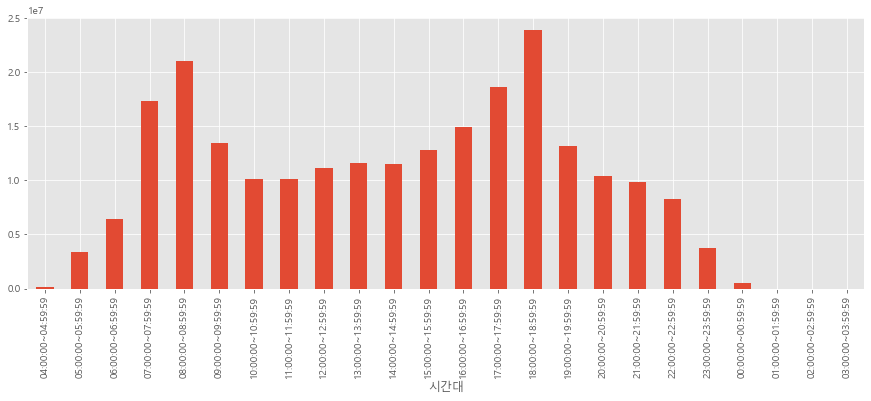

In [128]:
plt.style.use('ggplot') 
df_time.plot(kind='bar', figsize=(15, 5))
plt.show()

### 2. 출근 시간대 (7시 ~9시) 가장 많이 타고 내리는 역 찾기

In [149]:
df_work=df.iloc[1:,3:52]
df_work.set_index('지하철역', inplace=True)

df_work = df_work.iloc[:,6:10]
df_work.head()

,07:00:00~07:59:59,Unnamed: 11,08:00:00~08:59:59,Unnamed: 13
지하철역,,,,
서울역,42971,105213,87305,226780
시청,8160,65801,10751,203319
종각,7318,95355,12414,273124
종로3가,6657,27630,11028,79010
종로5가,5783,39965,9742,119740


In [150]:
df_work['출근시간대 승하차']=df_work.sum(axis=1)
df_work_max = df_work['출근시간대 승하차'].idxmax()
print('출근시간대 승하차가 가장 많은 역은 %s입니다.'%(df_work_max))

출근시간대 승하차가 가장 많은 역은 구로디지털단지입니다.


### 3. 밤 11시에 가장 많이 타는 역 찾기

In [136]:
df_11 = df_sts['23:00:00~23:59:59'].idxmax()
print('밤 11시에 가장 많이 타는 역은 %s입니다.'%(df_11))

밤 11시에 가장 많이 타는 역은 홍대입구입니다.
